In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
from pandas_profiling import ProfileReport

In [2]:
print(os.listdir('D:/Data center/Kaggle/Home credit default/'))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'pd_profilling_report.html', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [3]:
app_train = pd.read_csv('D:/Data center/Kaggle/Home credit default/application_train.csv')
app_test = pd.read_csv('D:/Data center/Kaggle/Home credit default/application_test.csv')

In [4]:
data_train = app_train.copy()
data_test = app_test.copy()

In [5]:
data_train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

# EDA

In [287]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [290]:
data_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [9]:
profile = ProfileReport(data_train, title  = "Pandas Profiling Report", minimal = True)

In [8]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profile.to_file("D:/Data center/Kaggle/Home credit default/pd_profilling_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# 4 sample with gender == "XNA" ??
data_train[data_train['CODE_GENDER'] == 'XNA']
#==> invalid data ( all the target ==0), just drop these sample

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657       19125.0         337500.0   Unaccompanied               Working   
38566       13500.0         225000.0          Family               Working   
83382       20250.0         225000.0   Unaccompanied               Working   
189640      27000.0         900000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                     0.020713      -20232         -10044   
38566                     0.026392      -13717          -2797   
83382                     0.035792      -10647          -1228   
189640                    0.035792       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
35657            -10024.0            -3537         13.0           1   
38566             -2241.0            -4659          NaN           1   
83382              -183.0            -1671          NaN           1   
189640            -4099.0            -2326          8.0           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
35657                1                1                 1           1   
38566                1                1                 1           1   
83382                1                1                 1           1   
189640               1                1                 1           1   

        FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657            0                 NaN              2.0                     3   
38566            0  Low-skill Laborers              4.0                     2   
83382            0          Core staff              3.0                     2   
189640           0                 NaN              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CI

In [291]:
#create a function return missing values of columns
def missing_values_table(df):
    '''a function that return missing values of a data frame'''
    # Total missing values
    miss_val = df.isnull().sum()
    # Percentage of missing values
    miss_val_percent = 100*miss_val/len(df)
    # Make a table with the results
    mis_val_table = pd.concat([miss_val,miss_val_percent],axis =1)
    mis_val_table = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    #Make a table of columns that contain missing values and sort it in descending order
    mis_val_table = mis_val_table = mis_val_table.sort_values(by = ['% of Total Values'],ascending = False)
    mis_val_table_columns = mis_val_table[mis_val_table['% of Total Values'] != 0]
    # Print the result
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_columns.shape[0]) +
              " columns that have missing values.")
     # Return the dataframe with missing information
    return mis_val_table_columns

In [292]:
missing_values_table(data_train)
#1.neu miss qua nhieu (> 40%-70%)==> drop column do
#2.fill dua tren univariate (mean,median,mode)
#3.Dung linear & treebase de model hoa missing value - dung nhung column con nguyen ven de predict tung column bi miss 1(khong thuong xuyen dung)
#4.Dung LGBM boosting (recommned sample > 10k)
# doc them fill missing value
# can xem them missing percentage o row
#real life strategy: giu feature con nguyen ven de trai trc, sau do add dan them cac feature bi miss, moi lan add, drop na theo row (chi giu lai cac sample nguyen ven), vd 5, 5+1,5+2,5+3

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                       214865          69.872297
COMMONAREA_AVG                        214865          69.872297
COMMONAREA_MODE                       214865          69.872297
NONLIVINGAPARTMENTS_MODE              213514          69.432963
NONLIVINGAPARTMENTS_AVG               213514          69.432963
NONLIVINGAPARTMENTS_MEDI              213514          69.432963
FONDKAPREMONT_MODE                    210295          68.386172
LIVINGAPARTMENTS_MODE                 210199          68.354953
LIVINGAPARTMENTS_AVG                  210199          68.354953
LIVINGAPARTMENTS_MEDI                 210199          68.354953
FLOORSMIN_AVG                         208642          67.848630
FLOORSMIN_MODE                        208642          67.848630
FLOORSMIN_MEDI                        208642          67.848630
YEARS_BUILD_MEDI                      204488          66.497784
YEARS_BUILD_MODE                      204488          66.497784
YEARS_BUILD_AVG                       204488          66.497784
OWN_CAR_AGE                           202929          65.990810
LANDAREA_MEDI                         182590          59.376738
LANDAREA_MODE                         182590          59.376738
LANDAREA_AVG                          182590          59.376738
BASEMENTAREA_MEDI                     179943          58.515956
BASEMENTAREA_AVG                      179943          58.515956
BASEMENTAREA_MODE                     179943          58.515956
EXT_SOURCE_1                          173378          56.381073
NONLIVINGAREA_MODE                    169682          55.179164
NONLIVINGAREA_AVG                     169682          55.179164
NONLIVINGAREA_MEDI                    169682          55.179164
ELEVATORS_MEDI                        163891          53.295980
ELEVATORS_AVG                         163891          53.295980
ELEVATORS_MODE                        163891          53.295980
WALLSMATERIAL_MODE                    156341          50.840783
APARTMENTS_MEDI                       156061          50.749729
APARTMENTS_AVG                        156061          50.749729
APARTMENTS_MODE                       156061          50.749729
ENTRANCES_MEDI                        154828          50.348768
ENTRANCES_AVG                         154828          50.348768
ENTRANCES_MODE                        154828          50.348768
LIVINGAREA_AVG                        154350          50.193326
LIVINGAREA_MODE                       154350          50.193326
LIVINGAREA_MEDI                       154350          50.193326
HOUSETYPE_MODE                        154297          50.176091
FLOORSMAX_MODE                        153020          49.760822
FLOORSMAX_MEDI                        153020          49.760822
FLOORSMAX_AVG                         153020          49.760822
YEARS_BEGINEXPLUATATION_MODE          150007          48.781019
YEARS_BEGINEXPLUATATION_MEDI          150007          48.781019
YEARS_BEGINEXPLUATATION_AVG           150007          48.781019
TOTALAREA_MODE                        148431          48.268517
EMERGENCYSTATE_MODE                   145755          47.398304
OCCUPATION_TYPE                        96391          31.345545
EXT_SOURCE_3                           60965          19.825307
AMT_REQ_CREDIT_BUREAU_HOUR             41519          13.501631
AMT_REQ_CREDIT_BUREAU_DAY              41519          13.501631
AMT_REQ_CREDIT_BUREAU_WEEK             41519          13.501631
AMT_REQ_CREDIT_BUREAU_MON              41519          13.501631
AMT_REQ_CREDIT_BUREAU_QRT              41519          13.501631
AMT_REQ_CREDIT_BUREAU_YEAR             41519          13.501631
NAME_TYPE_SUITE                         1292           0.420148
OBS_30_CNT_SOCIAL_CIRCLE                1021           0.332021
DEF_30_CNT_SOCIAL_CIRCLE                1021           0.332021
OBS_60_CNT_SOCIAL_CIRCLE                1021           0.332021
DEF_60_CNT_SOCIAL_CIRCLE                1021           0.33202

In [297]:
#find hihgly correlated feature
#should drop > 95% correalated features
# should drop/group high cardinarity featrues ( i.e cust ID)
corr_matrix_df = abs(data_train.corr())
upper = corr_matrix_df.where(np.triu(np.ones(corr_matrix_df.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [305]:
to_drop

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [13]:
print('top 10 negative correlation with target \n', corr_matrix_df['TARGET'].sort_values().head(10),'\n')
print('top 10 possitive correlation with target \n', corr_matrix_df['TARGET'].sort_values().tail(10))

top 10 negative correlation with target 
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64 

top 10 possitive correlation with target 
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64


#### EDA the day_birth feature


In [306]:
data_train['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

Text(0, 0.5, 'Counts')

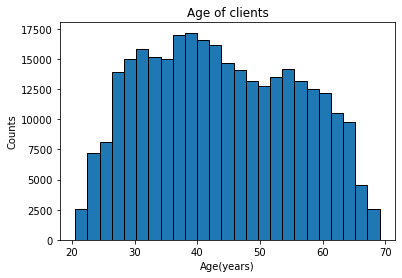

In [14]:
client_age = (-data_train['DAYS_BIRTH']/365)
client_age.plot(kind = 'hist', edgecolor = 'k', bins = 25, title = "Age of clients")
plt.xlabel('Age(years)')
plt.ylabel('Counts')

In [15]:
np.corrcoef(client_age,data_train['TARGET'])[0,1]
# the age feature has negative correlation with the target

-0.0782393083100326

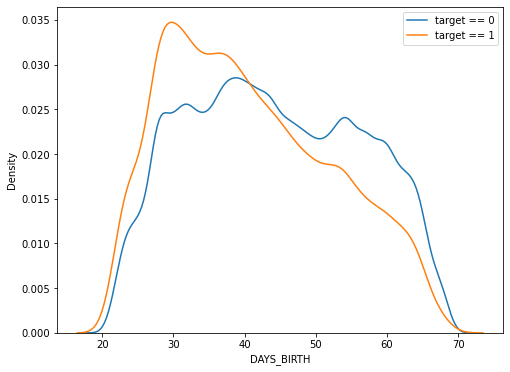

In [16]:
#plot to see the relationship between age and risk of default loan
plt.figure(figsize = (8, 6))
sns.kdeplot(data_train.loc[data_train['TARGET'] == 0,'DAYS_BIRTH']/-365, label = 'target == 0')
sns.kdeplot(data_train.loc[data_train['TARGET'] == 1,'DAYS_BIRTH']/-365, label = 'target == 1')
plt.legend()
#==> we can see that the older clients might be better at returning loan than younger ones to some extent

#### EDA the DAYS_EMPLOYED feature

<AxesSubplot:ylabel='Frequency'>

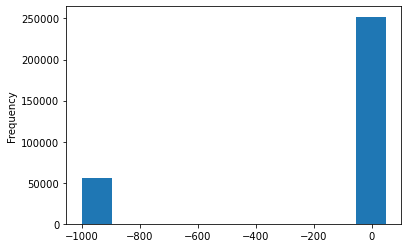

In [17]:
(data_train['DAYS_EMPLOYED']/-365).plot.hist()

In [18]:
#==> there an ridiculous extreme value of -1000 year emplyment, we need to replace it with a new column
data_train['DAYS_EMPLOYED_ANOM'] = 0
data_train.loc[data_train['DAYS_EMPLOYED'] == 365243,'DAYS_EMPLOYED_ANOM'] =1
data_test['DAYS_EMPLOYED_ANOM'] = 0
data_test.loc[data_train['DAYS_EMPLOYED'] == 365243,'DAYS_EMPLOYED_ANOM'] =1

In [19]:
data_train['DAYS_EMPLOYED_ANOM'].sum()

55374

In [20]:
data_test['DAYS_EMPLOYED_ANOM'].sum()

8694

In [21]:
# Replace the anomalous values with nan
data_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
data_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

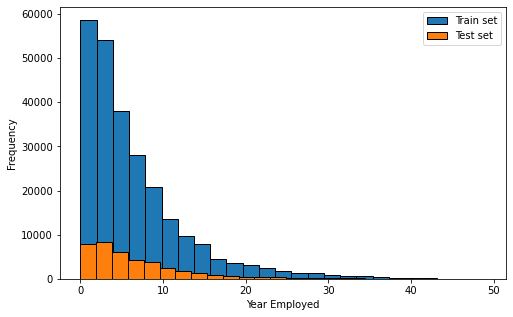

In [22]:
plt.figure(figsize = (8,5))
(data_train['DAYS_EMPLOYED']/-365).plot.hist(bins = 25, edgecolor = 'k', label = "Train set")
(data_test['DAYS_EMPLOYED']/-365).plot.hist(bins = 25, edgecolor = 'k', label = "Test set")
plt.xlabel('Year Employed')
plt.legend()
# The distribution looks to be much more in line with what we would expect,
# and we also have created a new column to tell the model that these values were originally anomalous

In [23]:
#EDA OCCUPATION_TYPE (Nghề nghiệp)
occu_type_table = data_train['OCCUPATION_TYPE'].value_counts(dropna=False)
occu_type_table = pd.DataFrame(occu_type_table)
occu_type_table.loc[np.nan]

OCCUPATION_TYPE    96391
Name: nan, dtype: int64

Text(0, 0.5, 'Count')

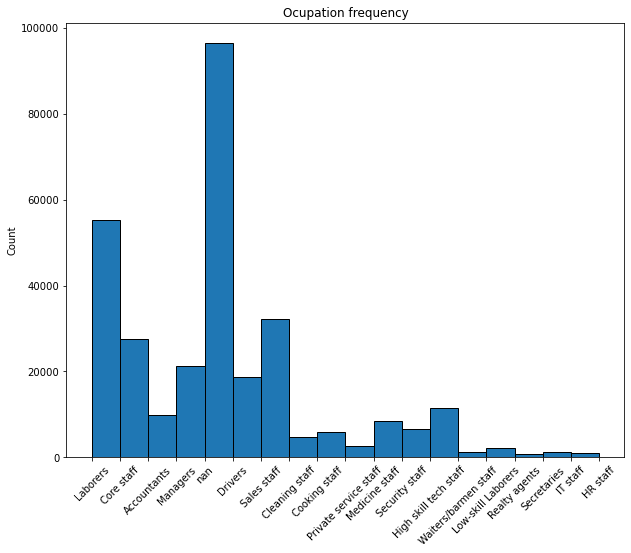

In [24]:
plt.figure(figsize = (10,8))
plt.hist(data_train['OCCUPATION_TYPE'].astype(str),edgecolor ='k', bins = len(data_train['OCCUPATION_TYPE'].value_counts()))
plt.xticks(rotation = 45, fontsize = 10)
plt.title('Ocupation frequency')
plt.ylabel('Count')


In [25]:
occu_type_table['Percent of defaut risk'] = 0
occu_type_table['Percent of defaut risk'].loc['Laborers']
for occu_type in occu_type_table.index:
    if str(occu_type) == 'nan':
        occu_type_table['Percent of defaut risk'].loc[np.nan] = 100*(data_train[data_train['OCCUPATION_TYPE'].isnull()]['TARGET'].sum()/occu_type_table['OCCUPATION_TYPE'].loc[np.nan])
    else:
        occu_type_table['Percent of defaut risk'].loc[occu_type] = 100*(data_train[data_train['OCCUPATION_TYPE'] == occu_type]['TARGET'].sum())/occu_type_table['OCCUPATION_TYPE'].loc[occu_type]


In [26]:
occu_type_table = occu_type_table.sort_values(by =['Percent of defaut risk'], ascending = False)

Text(0.5, 1.0, 'Percent of credit default per Occupation type')

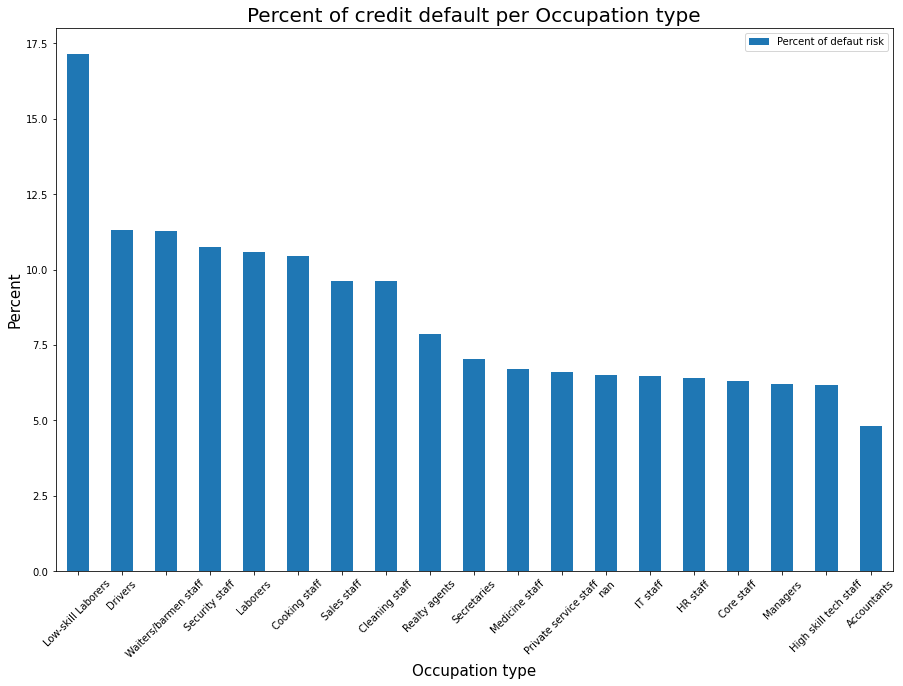

In [27]:
occu_type_table.plot(kind = 'bar', y = 'Percent of defaut risk', figsize = (15,10))
plt.xticks(rotation = 45)
plt.ylabel('Percent', fontsize = 15)
plt.xlabel('Occupation type', fontsize = 15)
plt.title('Percent of credit default per Occupation type', fontsize = 20)

#### ==> theres a clear relation between the occupation types and the targets, the higher skill clients's jobs are, the lesser chance of credit defaults occur

# Baseline model without feature engineering

### Preprocessing

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report

In [10]:
X = data_train.drop(labels = ['TARGET','SK_ID_CURR'], axis = 1)
y = data_train['TARGET']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=314, stratify=y)

In [101]:
categorical = X_train.dtypes == object

In [92]:
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [33]:
numerical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                                        ("scaler", StandardScaler())])

In [34]:
preprocess = ColumnTransformer(transformers=[('num',numerical_transformer,~categorical),
                                             ('cat',categorical_transformer,categorical)])

In [35]:
preprocess

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 NAME_CONTRACT_TYPE              False
CODE_GENDER                     False
FLAG_OWN_CAR                    False
FLAG_OWN_REALTY                 False
CNT_CHILDREN                     True
AMT_INCOME_TOTAL                 True
AMT_CREDIT                       True
AMT_ANNUITY                      True
AMT_GOODS_PRICE                  True
NAME_TYPE_SUITE                 False
NAME_INCOME_TYPE                False
NAME_EDUCATION_TYPE             False
NAME_FAMILY_...
FLAG_DOCUMENT_15                False
FLAG_DOCUMENT_16                False
FLAG_DOCUMENT_17                False
FLAG_DOCUMENT_18                False
FLAG_DOCUMENT_19                False
FLAG_DOCUMENT_20                False
FLAG_DOCUMENT_21                False
AMT_REQ_CREDIT_BUREAU_HOUR      False
AMT_REQ_CREDIT_BUREAU_DAY       False
AMT_REQ_CREDIT_BUREAU_WEEK      False
AMT_REQ_CREDIT_BUREAU_MON       False
AMT_REQ_CREDIT_BUREAU_QRT       False
AMT_REQ_CREDIT_BUREAU_YEAR      False
DAYS_EMPLOYED_ANOM              False
dtype: bool)])

In [36]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
preprocess_no_scaler = make_column_transformer((imp_mean,~categorical),(OneHotEncoder(handle_unknown = "ignore"), categorical))

In [37]:
preprocess_no_scaler

ColumnTransformer(transformers=[('simpleimputer', SimpleImputer(),
                                 NAME_CONTRACT_TYPE              False
CODE_GENDER                     False
FLAG_OWN_CAR                    False
FLAG_OWN_REALTY                 False
CNT_CHILDREN                     True
AMT_INCOME_TOTAL                 True
AMT_CREDIT                       True
AMT_ANNUITY                      True
AMT_GOODS_PRICE                  True
NAME_TYPE_SUITE                 False
NAME_INCOME_TYPE                False
NAME_EDUCATION_TYPE             False
NAME_FAMILY_STATUS              False
NAME_HOUSING_TYPE               False
REGION_POPULATI...
FLAG_DOCUMENT_15                False
FLAG_DOCUMENT_16                False
FLAG_DOCUMENT_17                False
FLAG_DOCUMENT_18                False
FLAG_DOCUMENT_19                False
FLAG_DOCUMENT_20                False
FLAG_DOCUMENT_21                False
AMT_REQ_CREDIT_BUREAU_HOUR      False
AMT_REQ_CREDIT_BUREAU_DAY       False
AMT_REQ_CREDIT_BUREAU_WEEK      False
AMT_REQ_CREDIT_BUREAU_MON       False
AMT_REQ_CREDIT_BUREAU_QRT       False
AMT_REQ_CREDIT_BUREAU_YEAR      False
DAYS_EMPLOYED_ANOM              False
dtype: bool)])

In [38]:
preprocess_only_oneHot = make_column_transformer((OneHotEncoder(handle_unknown = "ignore"), categorical))
preprocess_only_oneHot

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 NAME_CONTRACT_TYPE               True
CODE_GENDER                      True
FLAG_OWN_CAR                     True
FLAG_OWN_REALTY                  True
CNT_CHILDREN                    False
AMT_INCOME_TOTAL                False
AMT_CREDIT                      False
AMT_ANNUITY                     False
AMT_GOODS_PRICE                 False
NAME_TYPE_SUITE                  True
NAME_INCOME_TYPE                 True
NAME_EDUCATION_TYPE              True
NAME_FAMILY_STATUS               True
NAME_HOUSING_TYPE...
FLAG_DOCUMENT_15                False
FLAG_DOCUMENT_16                False
FLAG_DOCUMENT_17                False
FLAG_DOCUMENT_18                False
FLAG_DOCUMENT_19                False
FLAG_DOCUMENT_20                False
FLAG_DOCUMENT_21                False
AMT_REQ_CREDIT_BUREAU_HOUR      False
AMT_REQ_CREDIT_BUREAU_DAY       False
AMT_REQ_CREDIT_BUREAU_WEEK      False
AMT_REQ_CREDIT_BUREAU_MON       False
AMT_REQ_CREDIT_BUREAU_QRT       False
AMT_REQ_CREDIT_BUREAU_YEAR      False
DAYS_EMPLOYED_ANOM              False
dtype: bool)])

## Linear classification

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

### LogisticRegression

In [402]:
make_pipeline(preprocess,LogisticRegression())

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  NAME_CONTRACT_TYPE              False
CODE_GENDER                     False
FLAG_OWN_CAR                    False
FLAG_OWN_REALTY                 False
CNT_CHILDREN                     True
AMT_INCOME_TOTAL                 True
AMT_CREDIT                       True
AMT_ANNUITY                      True
AMT_GOODS_PRICE                  True
NAME_TYPE_SUITE                 False
NAME_INCOME_TYPE                Fals...
FLAG_DOCUMENT_18                False
FLAG_DOCUMENT_19                False
FLAG_DOCUMENT_20                False
FLAG_DOCUMENT_21                False
AMT_REQ_CREDIT_BUREAU_HOUR      False
AMT_REQ_CREDIT_BUREAU_DAY       False
AMT_REQ_CREDIT_BUREAU_WEEK      False
AMT_REQ_CREDIT_BUREAU_MON       False
AMT_REQ_CREDIT_BUREAU_QRT       False
AMT_REQ_CREDIT_BUREAU_YEAR      False
DAYS_EMPLOYED_ANOM              False
dtype: bool)])),
                ('logisticregression', LogisticRegression())])

In [310]:
lgr = make_pipeline(preprocess,LogisticRegression())

NameError: name 'LogisticRegression' is not defined

In [311]:
scores_lrn = cross_val_score(lgr, X_train, y_train, cv=5,error_score='raise')
np.mean(scores_lrn), np.std(scores_lrn)

NameError: name 'lgr' is not defined

In [398]:
scores_lrn

array([0.9191293 , 0.9191293 , 0.91973903, 0.91900571, 0.91931058])

In [399]:
lgr_no_scaler = make_pipeline(preprocess_no_scaler,LogisticRegression())
scores_lrn_no_scaler = cross_val_score(lgr_no_scaler, X_train, y_train, cv=5,error_score='raise')
np.mean(scores_lrn_no_scaler), np.std(scores_lrn_no_scaler)
#===> no different ?

C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

(0.9192709180109226, 8.03818827464363e-07)

In [401]:
lgr.fit(X_train,y_train)

C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  NAME_CONTRACT_TYPE              False
CODE_GENDER                     False
FLAG_OWN_CAR                    False
FLAG_OWN_REALTY                 False
CNT_CHILDREN                     True
AMT_INCOME_TOTAL                 True
AMT_CREDIT                       True
AMT_ANNUITY                      True
AMT_GOODS_PRICE                  True
NAME_TYPE_SUITE                 False
NAME_INCOME_TYPE                Fals...
FLAG_DOCUMENT_18                False
FLAG_DOCUMENT_19                False
FLAG_DOCUMENT_20                False
FLAG_DOCUMENT_21                False
AMT_REQ_CREDIT_BUREAU_HOUR      False
AMT_REQ_CREDIT_BUREAU_DAY       False
AMT_REQ_CREDIT_BUREAU_WEEK      False
AMT_REQ_CREDIT_BUREAU_MON       False
AMT_REQ_CREDIT_BUREAU_QRT       False
AMT_REQ_CREDIT_BUREAU_YEAR      False
DAYS_EMPLOYED_ANOM              False
dtype: bool)])),
                ('logisticregression', LogisticRegression())])

##### Tunning

In [28]:
from sklearn.model_selection import GridSearchCV

In [407]:
lgr = make_pipeline(preprocess,LogisticRegression())

In [408]:
param_grid_lgr ={'logisticregression__penalty':('l1', 'l2', 'elasticnet', 'none'),
                 'logisticregression__l1_ratio':np.linspace(0,1,11)} 
grid_lgr = GridSearchCV(lgr,param_grid_lgr,cv= 5)
grid_lgr.fit(X_train,y_train)
print(grid_lgr.best_params_)
print(grid_lgr.score(X_test,y_test))

C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: 

C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: 

C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning

C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarni

C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarni

KeyboardInterrupt: 

#### 
#### Model evaluation

##### Confusion matrix

[[56465    73]
 [ 4911    54]]
0.9189633026031251


C:\Code\envs\py39sklearn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


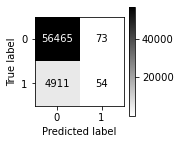

In [305]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
y_pred = lgr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(lgr.score(X_test,y_test))
fig, ax = plt.subplots(figsize=(2, 2))
plot_confusion_matrix(lgr, X_test, y_test, cmap='gray_r', ax=ax)


##### report

In [307]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#===> the recall score is so low


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.43      0.01      0.02      4965

    accuracy                           0.92     61503
   macro avg       0.67      0.50      0.49     61503
weighted avg       0.88      0.92      0.88     61503



In [308]:
#change the threshold to see if reacall change
y_pred = lgr.predict_proba(X_test)[:,1]>0.1
print(classification_report(y_test, y_pred))


NameError: name 'lgr' is not defined

In [313]:
#calculate roc_auc
lgr = make_pipeline(preprocess,LogisticRegression())
roc_auc =  cross_val_score(lgr, X, y, scoring="roc_auc")
roc_auc

C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.74575544, 0.74546199, 0.74242962, 0.74806445, 0.75087909])

##### ROC CURVE


C:\Code\envs\py39sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Code\envs\py39sklearn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


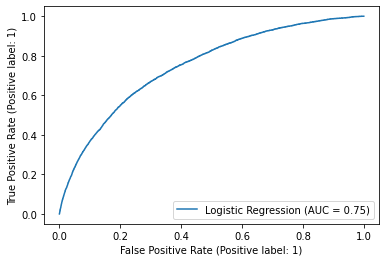

In [315]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
lgr.fit(X_train,y_train)
plot_roc_curve(lgr, X_test, y_test, name='Logistic Regression')

##### feature importance

In [309]:
lgr.coef_

NameError: name 'lgr' is not defined

## Random Forest

In [312]:
from sklearn.ensemble import RandomForestClassifier

In [313]:
rdf = make_pipeline(preprocess_no_scaler,RandomForestClassifier(n_estimators = 200,random_state = 10, max_depth = 5,min_samples_leaf = 2,min_samples_split =2, verbose = 0, n_jobs = -1))

In [314]:
rdf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(),
                                                  NAME_CONTRACT_TYPE              False
CODE_GENDER                     False
FLAG_OWN_CAR                    False
FLAG_OWN_REALTY                 False
CNT_CHILDREN                     True
AMT_INCOME_TOTAL                 True
AMT_CREDIT                       True
AMT_ANNUITY                      True
AMT_GOODS_PRICE                  True
NAME_TYPE_SUITE                 False
NAME_INCOME_TYPE                False
NAME_EDUCATION_TYPE             False
NAME_FAMILY_STATUS              False...
FLAG_DOCUMENT_21                False
AMT_REQ_CREDIT_BUREAU_HOUR      False
AMT_REQ_CREDIT_BUREAU_DAY       False
AMT_REQ_CREDIT_BUREAU_WEEK      False
AMT_REQ_CREDIT_BUREAU_MON       False
AMT_REQ_CREDIT_BUREAU_QRT       False
AMT_REQ_CREDIT_BUREAU_YEAR      False
DAYS_EMPLOYED_ANOM              False
dtype: bool)])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=2,
                                        n_estimators=200, n_jobs=-1,
                                        random_state=10))])

In [325]:
rdf.steps[1][1].feature_importances_

array([8.72225713e-04, 1.47769260e-03, 1.77301189e-02, 3.20277811e-03,
       2.25239895e-02, 5.83634630e-03, 4.87033892e-02, 6.80466340e-02,
       5.87413706e-03, 1.34709789e-02, 6.88545107e-03, 0.00000000e+00,
       8.49572226e-03, 8.83975481e-04, 1.89017333e-05, 2.65313931e-04,
       2.24134910e-05, 6.22427054e-04, 9.55323777e-03, 1.45535989e-02,
       1.07792794e-03, 0.00000000e+00, 1.61362596e-05, 1.27983834e-04,
       7.15136605e-03, 9.60614607e-03, 3.60560541e-04, 6.29871079e-02,
       2.01978072e-01, 1.94993486e-01, 1.44140415e-03, 8.18948935e-04,
       3.01270053e-03, 6.78529578e-04, 2.69739717e-04, 3.05460146e-03,
       8.61940625e-04, 2.67480902e-03, 3.58545368e-04, 5.07014710e-04,
       7.45982512e-04, 3.12381339e-03, 3.93969382e-04, 4.83605280e-04,
       9.97548948e-04, 5.96807640e-04, 3.92713919e-03, 4.63706797e-04,
       4.60471298e-04, 2.50174866e-03, 4.36145409e-04, 3.82510006e-03,
       1.01437150e-03, 6.07072967e-04, 7.22447714e-04, 1.40842897e-03,
      

In [320]:
dir(rdf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_is_fitted__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_can_inverse_transform',
 '_can_transform',
 '_check_feature_names',
 '_check_fit_params',
 '_check_n_features',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_param_names',
 '_get_params',
 '_get_tags',
 '_iter',
 '_log_message',
 '_more_tags',
 '_replace_estimator',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_params',
 '_sk_visual_block_',
 '_validate_data',
 '_validate_names',
 '_validate_steps',
 'classes_',
 'decisio

In [75]:
rdf.score(X_test,y_test)

0.9192722306228964

##### confusion matrix

[[56538     0]
 [ 4965     0]]
0.9192722306228964


C:\Code\envs\py39sklearn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


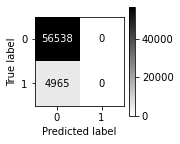

In [76]:
y_pred = rdf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(rdf.score(X_test,y_test))
fig, ax = plt.subplots(figsize=(2, 2))
plot_confusion_matrix(rdf, X_test, y_test, cmap='gray_r', ax=ax)

##### report

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.00      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



C:\Code\envs\py39sklearn\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Code\envs\py39sklearn\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Code\envs\py39sklearn\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### roc_auc

In [78]:
y_hat = rdf.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_hat)

0.7258554442276022

C:\Code\envs\py39sklearn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


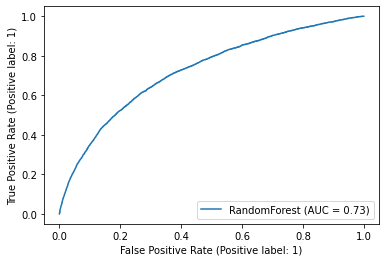

In [79]:
plot_roc_curve(rdf, X_test, y_test, name='RandomForest')

C:\Code\envs\py39sklearn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


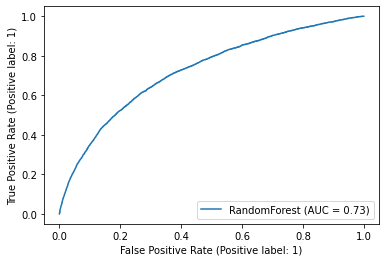

In [80]:
plot_roc_curve(rdf, X_test, y_test, name='RandomForest')

##### Find the best threshold 

In [81]:
roc_cureve_df = pd.DataFrame(roc_curve(y_test,y_hat))
fpr, tpr, thresholds = roc_curve(y_test,y_hat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr*(1-fpr))
ix = np.argmax(gmeans)
print('Best thresh hold: {} , best G-Mean: {},'.format(thresholds[ix],gmeans[ix]))

Best thresh hold: 0.08648222774735924 , best G-Mean: 0.671299531756103,


In [82]:
from sklearn.metrics import recall_score
y_pred = rdf.predict_proba(X_test)[:,1] > thresholds[ix]
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(f'In conlusion, the best theshold is {round(thresholds[ix],3)}, at which level the recall rate is {round(recall_score(y_test, y_pred),3)}')

              precision    recall  f1-score   support

           0       0.96      0.68      0.80     56538
           1       0.15      0.66      0.25      4965

    accuracy                           0.68     61503
   macro avg       0.56      0.67      0.52     61503
weighted avg       0.89      0.68      0.75     61503

[[38579 17959]
 [ 1687  3278]]
In conlusion, the best theshold is 0.086, at which level the recall rate is 0.66


Text(0.5, 15.0, 'Predicted Label')

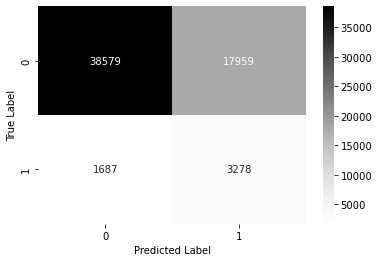

In [83]:
# sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test,y_pred), cmap = 'Greys', annot = True,fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

##### Feature inportance

In [102]:
X_train_pps = preprocess_no_scaler.fit_transform(X_train)
X_test_pps = preprocess_no_scaler.transform(X_test)


In [103]:
rf = RandomForestClassifier(n_estimators = 200,random_state = 10, max_depth = 5,
                            min_samples_leaf = 2,min_samples_split =2, verbose = 0, n_jobs = -1)

In [104]:
rf.fit(X_train_pps,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=200,
                       n_jobs=-1, random_state=10)

In [107]:
sorted_idx = rf.feature_importances_.argsort()

In [112]:
sorted_idx.head(20)

(251,)

In [115]:
X_train_pps.columns[sorted_idx.head(20)]
# ==> cannot use feature importance while using preprocess?

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [121]:
import shap
rdf_expaliner = shap.TreeExplainer(rf,X_train_pps)
shap_values = rdf_expaliner.shap_values(X_test_pps)
# taking too long for this computer


100%|===================| 122956/123006 [38:29<00:00]        

In [131]:
np.array(shap_values).shape

(2, 61503, 251)

In [133]:
shap.plots.bar(shap_values)

AssertionError: You must pass an Explanation object, Cohorts object, or dictionary to bar plot!

##### Grid Search

In [96]:
pipe_rdf = make_pipeline(preprocess_no_scaler,RandomForestClassifier())

In [100]:
param_RF = {'randomforestclassifier__max_depth' : [4, 5],
           'randomforestclassifier__n_estimators': [50, 150, 100, 200, 300, 350, 400],
           'randomforestclassifier__min_samples_split': [2, 3, 4],
           'randomforestclassifier__min_samples_leaf': [2, 5]}

In [101]:
rdf_gridCV = GridSearchCV(pipe_rdf,param_RF,cv = 5, n_jobs = -1)

In [ ]:
rdf_gridCV.fit(X_train,y_train)

## LGBM

In [12]:
import lightgbm as lgb


In [13]:
for c in X.columns:
    col_type = X[c].dtype
    if col_type == 'object' or col_type.name == 'category':
       X[c] = X[c].astype('category')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 120 entries, NAME_CONTRACT_TYPE to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: category(16), float64(65), int64(39)
memory usage: 248.7 MB


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=314, stratify= y)

In [17]:
fit_params={"early_stopping_rounds":20, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': 'auto' # that's actually the default
           }

In [18]:
clf = lgb.LGBMClassifier(num_leaves= 15, max_depth=-1, 
                         random_state=314, 
                         silent=True, 
                         metric='None', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.1)
        

In [19]:
clf.fit(X_train, y_train, **fit_params)

C:\Code\envs\py39sklearn\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Code\envs\py39sklearn\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Code\envs\py39sklearn\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a f

[100]	valid's auc: 0.758057


LGBMClassifier(colsample_bytree=0.9, metric='None', n_estimators=1000, n_jobs=4,
               num_leaves=15, random_state=314, silent=True, subsample=0.9)

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.


Text(0.5, 1.0, 'ROC AUC Curve')

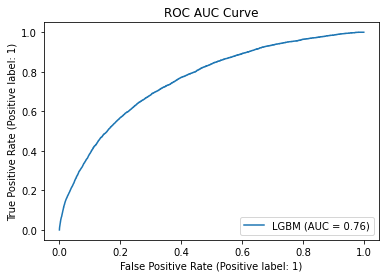

In [141]:
plot_roc_curve(clf, X_test, y_test, name='LGBM')
plt.title('ROC AUC Curve')

##### find the best threshold 

[[56487    51]
 [ 4883    82]]
0.9197762710762076


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


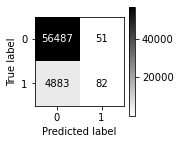

In [142]:
#default threshold
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(clf.score(X_test,y_test))
fig, ax = plt.subplots(figsize=(2, 2))
plot_confusion_matrix(clf, X_test, y_test, cmap='gray_r', ax=ax)


In [143]:
#default report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.62      0.02      0.03      4965

    accuracy                           0.92     61503
   macro avg       0.77      0.51      0.50     61503
weighted avg       0.90      0.92      0.88     61503



In [144]:
#find the best threshold
from sklearn.metrics import roc_curve
# calculate roc curves
y_hat = clf.predict_proba(X_test)[:,1]
roc_cureve_df = pd.DataFrame(roc_curve(y_test,y_hat))
fpr, tpr, thresholds = roc_curve(y_test,y_hat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr*(1-fpr))

In [145]:
ix = np.argmax(gmeans)
print('Best thresh hold: {} , best G-Mean: {},'.format(thresholds[ix],gmeans[ix]))

Best thresh hold: 0.07877606345441693 , best G-Mean: 0.6930927835678954,


In [146]:
roc_cureve_df[ix]

0    0.303831
1    0.690030
2    0.078776
Name: 5406, dtype: float64

In [147]:
from sklearn.metrics import recall_score
y_pred = clf.predict_proba(X_test)[:,1] > thresholds[ix]
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(f'In conlusion, the best theshold is {round(thresholds[ix],3)}, at which level the recall rate is {round(recall_score(y_test, y_pred),3)}')

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     56538
           1       0.17      0.69      0.27      4965

    accuracy                           0.70     61503
   macro avg       0.56      0.69      0.54     61503
weighted avg       0.90      0.70      0.76     61503

[[39360 17178]
 [ 1540  3425]]
In conlusion, the best theshold is 0.079, at which level the recall rate is 0.69


##### Feature importance

In [241]:
clf.feature_importances_

array([ 23,  29,   5,   4,   0,  19,  91,  62,  66,   2,   8,  19,  20,
         5,  11,  63,  52,  25,  46,  37,   0,   0,  11,   0,   2,   0,
        36,   1,   3,  14,   5,   7,   0,   0,   0,   8,   1,   4, 217,
       131, 111, 117,   5,   5,   3,   2,   5,   0,   4,   1,   3,  14,
         4,   3,   2,   4,   5,   1,   3,   1,   4,   0,   1,   2,   0,
         3,   4,   3,   6,   2,   4,   2,   9,   0,   5,   0,   0,   3,
         0,   0,   1,   5,   0,   2,   0,   1,   4,   6,   0,   7,  14,
         1,  11,  22,   0,  10,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   3,   0,   0,   6,   0,   7,   0,   0,   0,   0,   0,   1,
         3,  21,  18,   0])

<AxesSubplot:>

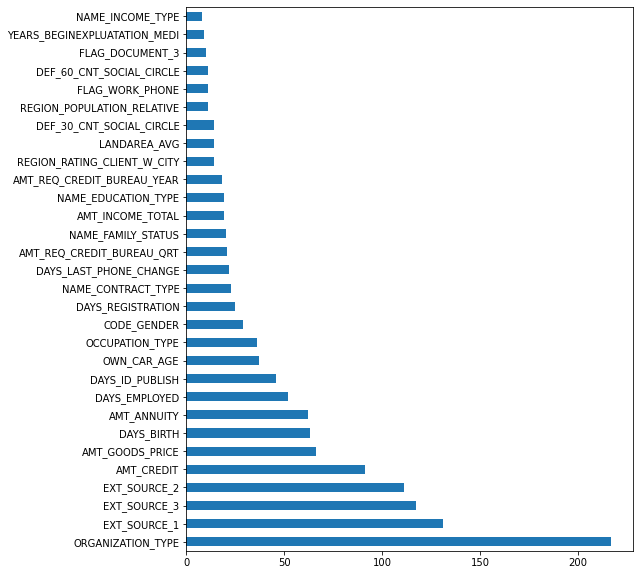

In [245]:
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

###### Shapley value

In [155]:
import shap
shap.initjs()
                  

In [256]:
# Fits the explainer
explainer = shap.TreeExplainer(clf)
# Calculates the SHAP values 
shap_values = explainer.shap_values(X_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [327]:
shap_values

[array([[-0.02091969, -0.2187664 ,  0.01941681, ...,  0.00526911,
          0.01275064,  0.        ],
        [-0.02778927, -0.07217504,  0.01622231, ..., -0.03934111,
         -0.01685555,  0.        ],
        [-0.02468195, -0.12204692, -0.012383  , ..., -0.00737132,
          0.01207027,  0.        ],
        ...,
        [-0.03479428,  0.0579499 , -0.00322715, ..., -0.00267227,
         -0.03403332,  0.        ],
        [-0.02927511,  0.01662232, -0.00304136, ..., -0.01346373,
          0.04370335,  0.        ],
        [-0.02007454, -0.15880204,  0.01553483, ..., -0.040658  ,
         -0.0159005 ,  0.        ]]),
 array([[ 0.02091969,  0.2187664 , -0.01941681, ..., -0.00526911,
         -0.01275064,  0.        ],
        [ 0.02778927,  0.07217504, -0.01622231, ...,  0.03934111,
          0.01685555,  0.        ],
        [ 0.02468195,  0.12204692,  0.012383  , ...,  0.00737132,
         -0.01207027,  0.        ],
        ...,
        [ 0.03479428, -0.0579499 ,  0.00322715, ...,  

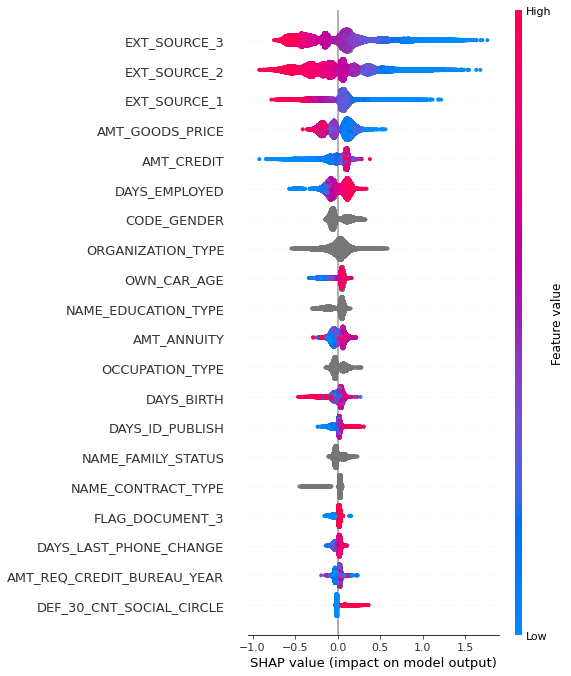

In [260]:
shap.summary_plot(shap_values[1], X_test)
#tai khong khong plot = dot duoc ?

In [268]:
shap.force_plot(explainer.expected_value[1], np.array(shap_values)[1,0,:], X_test.iloc[0,:])


In [326]:
explainer.expected_value

[2.7711777414825587, -2.7711777414825587]

In [270]:
np.array(shap_values)[1,0,:].shape

(121,)

In [281]:
X_test['EXT_SOURCE_2'].iloc[0]

0.2975951041145836

In [282]:
X_test['EXT_SOURCE_2'].mean()

0.5142963565106122